### Tarea 9.9

Calcule la siguiente integral

$$
\int_{0.1}^1 dx\,\frac{\ln(x)}{\sqrt{\cos^2(x) + \tanh(x)}}
$$

Hágalo usando la cuadratura adaptativa y el integrador de scipy. Grafique los tiempos que tardan ambos en función de la precisión pedida.

In [2]:
#Importamos las librerias 
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.integrate import quad

Text(0.5, 1.0, 'Grafico función')

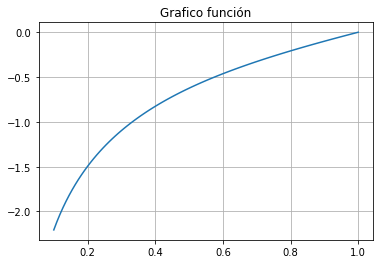

In [31]:
#Definimos la función pedida y la graficamos
def f(x):
    return np.log(x)/(np.sqrt(np.cos(x)**2 + np.tanh(x)))
x = np.linspace(0.1,1,100);
plt.plot(x,f(x))
plt.grid(True);
plt.title('Grafico función')

In [8]:
#Importamos las funciones
class MaxIterations(Exception):
    pass
def adaptive(f, a, b, tol, N=100000):
    
    # Variables iniciales
    approx = 0
    i = 0
    toli = [10*tol]
    ai = [a]
    hi = [(b - a)/2]
    fai = [f(a)]
    fbi = [f(b)]
    fci = [f(a + hi[i])]
    S0i = [hi[i]*(fai[i] + 4*fci[i] + fbi[i])/3]
    Li = [1]
    
        
    
    while i >= 0:
        
        fd = f(ai[i] + hi[i]/2)
        fe = f(ai[i] + 3*hi[i]/2)
        S1 = hi[i]*(fai[i] + 4*fd + fci[i])/6
        S2 = hi[i]*(fci[i] + 4*fe + fbi[i])/6
        ai_prec = ai[i]
        hi_prec = hi[i]
        fai_prec = fai[i]
        fbi_prec = fbi[i]
        fci_prec = fci[i]
        toli_prec = toli[i]
        S0i_prec = S0i[i]
        Li_prec = Li[i]
        
        i -= 1
        if abs(S1 + S2 - S0i_prec) < toli_prec:
            approx += S1 + S2
        else:
            if Li_prec >= N:
                raise MaxIterations("Alcanzado máximo número de iteraciones.")
            
            # Intervalo derecho
            i += 1
            if i >= len(ai): # A veces hay que ampliar la lista
                ai.append(ai_prec + hi_prec)
                fai.append(fci_prec)
                fci.append(fe)
                fbi.append(fbi_prec)
                hi.append(hi_prec/2)
                toli.append(toli_prec/2)
                S0i.append(S2)
                Li.append(Li_prec + 1)
            else:
                ai[i] = ai_prec + hi_prec
                fai[i] = fci_prec
                fci[i] = fe
                fbi[i] = fbi_prec
                hi[i] = hi_prec/2
                toli[i] = toli_prec/2
                S0i[i] = S2
                Li[i] = Li_prec + 1
                
            # Intervalo izquierdo
            i += 1
            if i >= len(ai):
                ai.append(ai_prec)
                fai.append(fai_prec)
                fci.append(fd)
                fbi.append(fci_prec)
                hi.append(hi[i-1])
                toli.append(toli[i-1])
                S0i.append(S1)
                Li.append(Li[i-1])
            else:
                ai[i] = ai_prec
                fai[i] = fai_prec
                fci[i] = fd
                fbi[i] = fci_prec
                hi[i] = hi[i-1]
                toli[i] = toli[i-1]
                S0i[i] = S1
                Li[i] = Li[i-1]
                
    return approx

In [27]:
tol = np.linspace(1e-14,1e-6,100);
t_adaptive = []
#Calculamos el tiempo en función de la tolerancia para el metodo de curva adaptativa
for t in tol:
    time1=time();
    adaptive(f,0.1,1,t);
    time2=time();
    t_adaptive.append(time2-time1);
#Calculamos el tiempo en función de la tolerancia con el integral de scipy
t_quad=[];
for t in tol:
    time1=time();
    quad(f,0.1,1,epsrel=t);
    time2=time();
    t_quad.append(time2-time1);

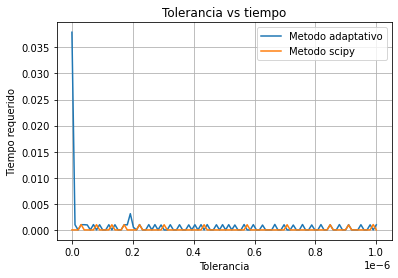

In [32]:
plt.plot(tol,t_adaptive,label='Metodo adaptativo');
plt.plot(tol,t_quad,label='Metodo scipy');
plt.xlabel('Tolerancia');
plt.ylabel('Tiempo requerido');
plt.legend();
plt.grid(True);
plt.title('Tolerancia vs tiempo');

In [20]:
?quad

# Calificación: 6.5

El tiempo graficado es puro ruido. El problema se discutió dos veces en clase: A veces el computador tarda demasiado poco en hacer un cálculo y entonces no logra medir el tiempo que tarda el cálculo de por sí. Lo que mide es el tiempo que tarda en la cola del sistema operativo, acceder a la memoria, etc, que es el mismo para todas las tolerancias. Por lo tanto lo que hay que hacer es pedir una precisión muy alta o repetir el cálculo muchas veces, para que el pc tarde en calcular y sea medible el tiempo.